# Data Visualization and EDA

## Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import MPG dataset

Berikut penjelasan setiap variabel yang akan kita gunakan sapanjang latihan ini :

* mpg : jarak tempuh per gallon
* cylinders : jumlah silinder
* displacement : volume langkah piston
* horsepower : tenaga mesin yang dihasilkan
* weight : berat mobil
* acceleration : waktu akselerasi dari 0 sampai 60 km
* model_year : tahun pembuatan
* origin : asal mobil
* name : nama mobil

In [4]:
mpg = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tetris python/mpg.csv")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Pengamatan:
1. Dataset memiliki 9 kolom, dengan ukuran 398 baris
2. 7 kolom numerik, 2 kolom kategorik
3. Terdapat missing values di kolom horsepower

##Missing Value

In [6]:
# Menampilkan missing value
missing_values_horsepower = mpg[mpg["horsepower"].isnull()]
print(missing_values_horsepower)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN    2046          19.0   
126  21.0          6         200.0         NaN    2875          17.0   
330  40.9          4          85.0         NaN    1835          17.3   
336  23.6          4         140.0         NaN    2905          14.3   
354  34.5          4         100.0         NaN    2320          15.8   
374  23.0          4         151.0         NaN    3035          20.5   

     model_year  origin                  name  
32           71     usa            ford pinto  
126          74     usa         ford maverick  
330          80  europe  renault lecar deluxe  
336          80     usa    ford mustang cobra  
354          81  europe           renault 18i  
374          82     usa        amc concord dl  


<Axes: xlabel='horsepower'>

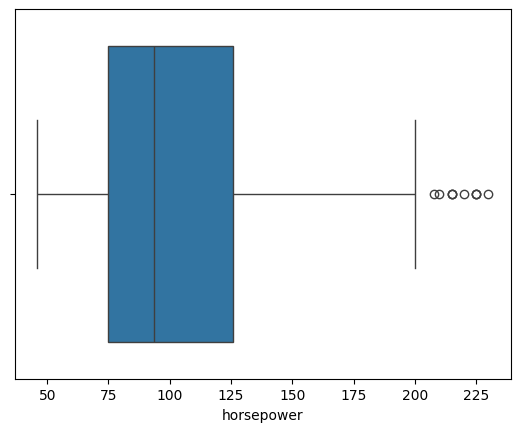

In [7]:
#cek outlier pada variable 	horsepower
sns.boxplot(data=mpg, x="horsepower")
# terdapat outlier diatas Q3 maka dari itu kita akan mengimputasi dengan nilai tengah dari pada nilai rata-rata

In [8]:
median_horsepower = mpg["horsepower"].median()
mpg["horsepower"].fillna(median_horsepower, inplace=True)

# Menampilkan dataframe setelah pengisian nilai
print(mpg)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa      

## EDA (Exploratory Data Analysis)

In [9]:
numerik = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year"]
kategorik = ["origin","name"]

In [10]:
mpg[numerik].describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [11]:
mpg[kategorik].describe()

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


###Korelasi Data

<ipython-input-12-0ee5eb5110fd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = mpg.corr()


<Axes: >

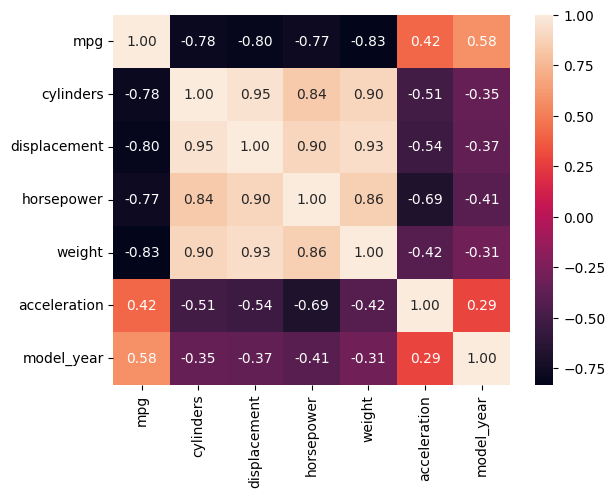

In [12]:
# bagaimana korelasi antar variabel yang numerik?
correlation = mpg.corr()
sns.heatmap(correlation, annot=True, fmt=".2f")

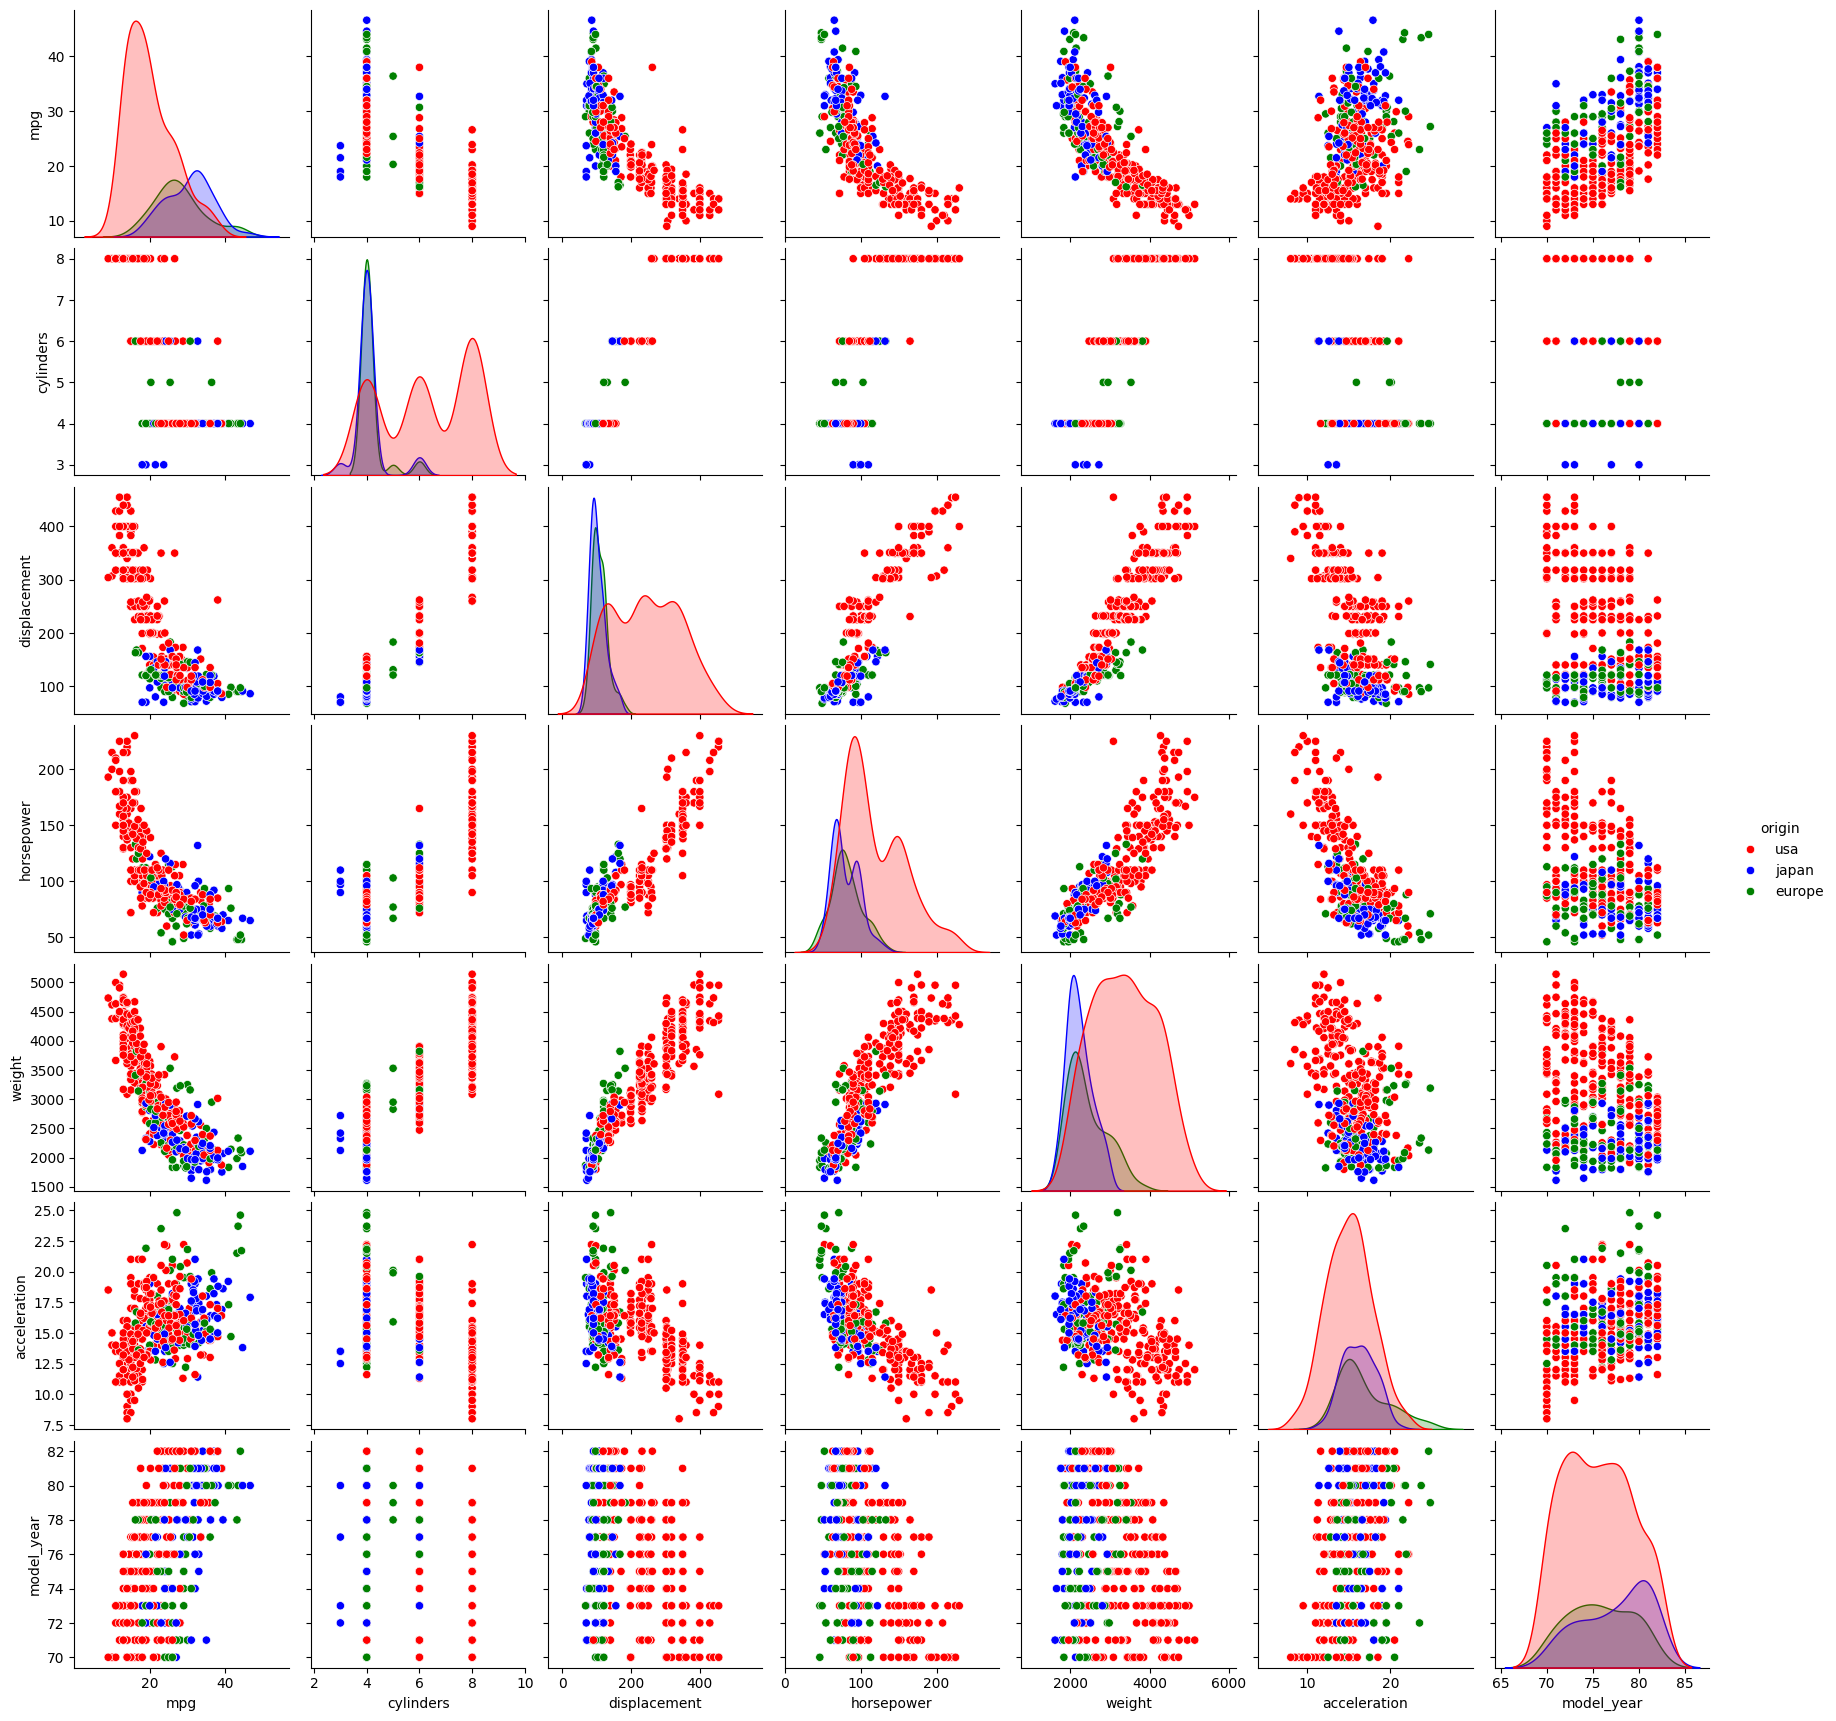

In [13]:
sns.pairplot(mpg, diag_kind="kde", hue="origin", palette={"usa": "red", "japan": "blue", "europe": "green"})  # Gunakan diag_kind="hist" jika ingin histogram diagonal
plt.show()

Berdasarkan korelasi data numerik antara lain :
- Yang berkorelasi negatif dengan mpg yaitu
1. weight
2. displacement
3. cylinders
4. horsepower
- Yang berkorelasi positif >= 0,90 yaitu
1. displacement dengan weight dan horsepower

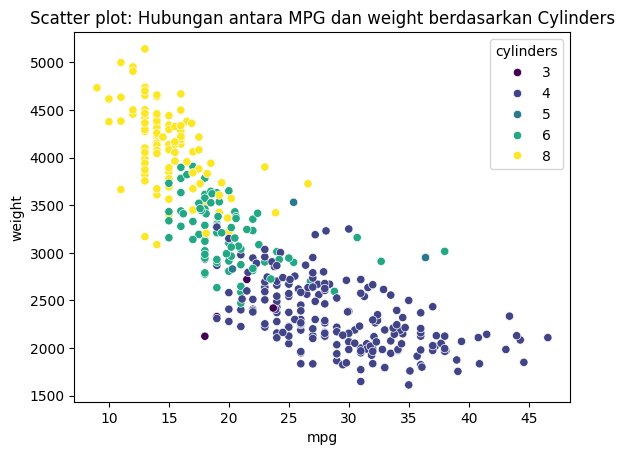

In [14]:
# 1.1 korelasi mpg dan weight berdasarkan Cylinders
sns.scatterplot(x="mpg", y="weight", hue="cylinders", data=mpg, palette="viridis")
plt.title("Scatter plot: Hubungan antara MPG dan weight berdasarkan Cylinders")
plt.show()

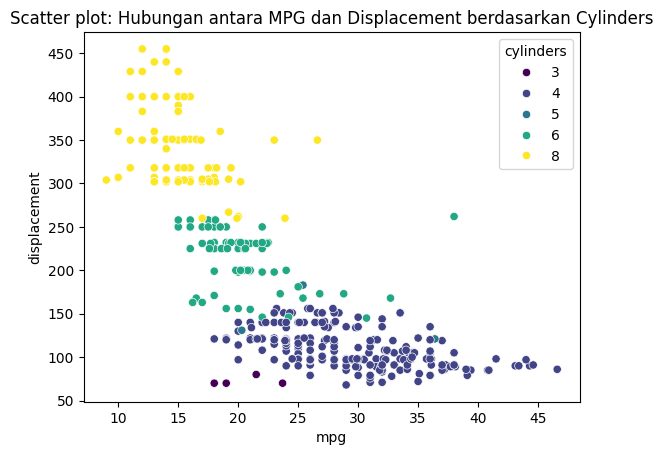

In [15]:
# 1.2 korelasi mpg dan Displacement berdasarkan Cylinders
sns.scatterplot(x="mpg", y="displacement", hue="cylinders", data=mpg, palette="viridis")
plt.title("Scatter plot: Hubungan antara MPG dan Displacement berdasarkan Cylinders")
plt.show()

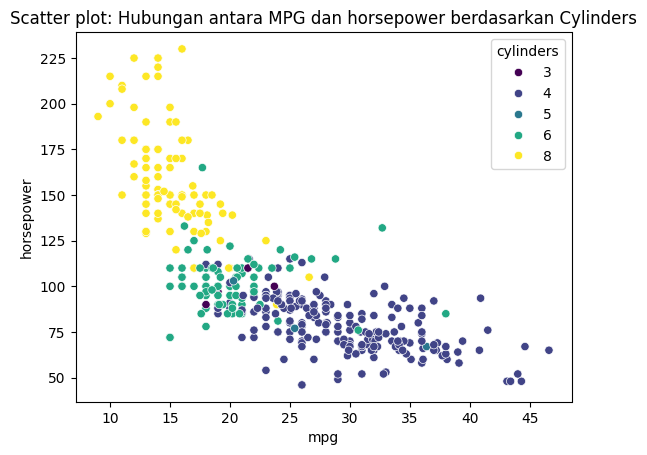

In [16]:
# 1.3 korelasi mpg dan horsepower berdasarkan Cylinders
sns.scatterplot(x="mpg", y="horsepower", hue="cylinders", data=mpg, palette="viridis")
plt.title("Scatter plot: Hubungan antara MPG dan horsepower berdasarkan Cylinders")
plt.show()

Kesimpulan :
* Pada weight, displacement dan horsepower memiliki hasil korelasi yang sama terhadapt mpg yaitu **semakin tinggi weight, displacement dan horsepower** maka **semakin rendah mpg** atau mobil cenderung menjadi kurang efisien dalam penggunaan bahan bakar, yang tercermin dalam penurunan nilai "mpg"
* Mobil dengan **jumlah cylinders yang tinggi** cenderung memiliki efisiensi bahan bakar yang rendah **(mpg rendah)**, dan seringkali mobil dengan jumlah **cylinders yang tinggi** juga memiliki **weight, displacement, dan horsepower** yang **tinggi**.

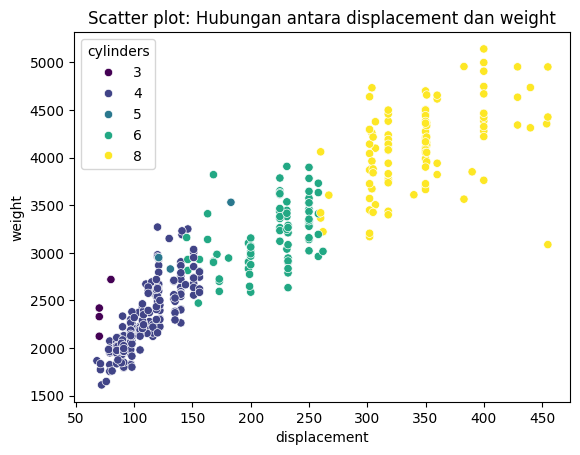

In [17]:
#2.1.1 korelasi displacement dengan weight
sns.scatterplot(x="displacement", y="weight", hue="cylinders", data=mpg, palette="viridis")
#sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.title("Scatter plot: Hubungan antara displacement dan weight")
plt.show()

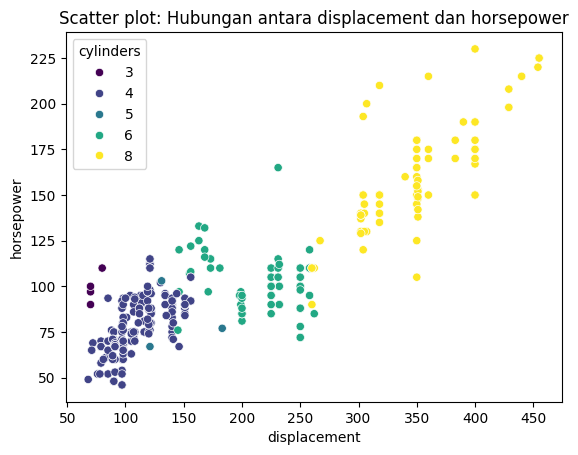

In [18]:
#2.1.2 korelasi displacement dengan horsepower
sns.scatterplot(x="displacement", y="horsepower", hue="cylinders", data=mpg, palette="viridis")
plt.title("Scatter plot: Hubungan antara displacement dan horsepower")
plt.show()

Kesimpulan:
* Pada hubungan korelasi displacement dengan weight dan horsepower memiliki buhungan yang positif yaitu **semakin tinggi displacement** maka akan **semakin tinggi juga weight dan horsepower**
1. **Displacement yang lebih besar** seringkali mengindikasikan mesin yang lebih besar atau kompleks, yang dapat menyebabkan **peningkatan bobot kendaraan (weight)**.
2. Mesin yang memiliki **Displacement lebih besar** biasanya dapat membakar lebih banyak bahan bakar dan menghasilkan daya yang lebih besar, yang tercermin dalam **nilai "horsepower" yang lebih tinggi**

###Analisis Berdasarkan Origin

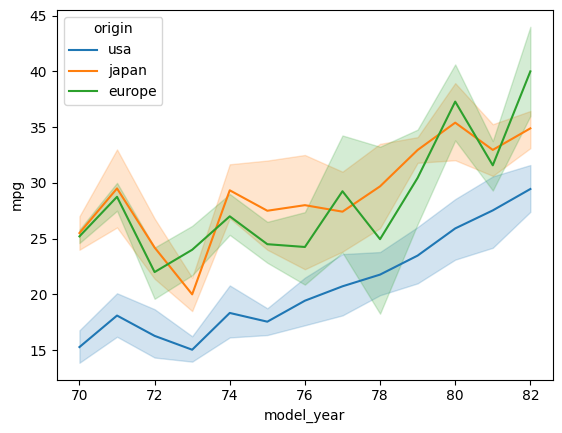

In [19]:
sns.lineplot(data=mpg, x="model_year", y="mpg", hue="origin")
plt.xticks(rotation = 0)
plt.show()

<ipython-input-20-d64026b3509f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=mpg, x='origin', palette="viridis")


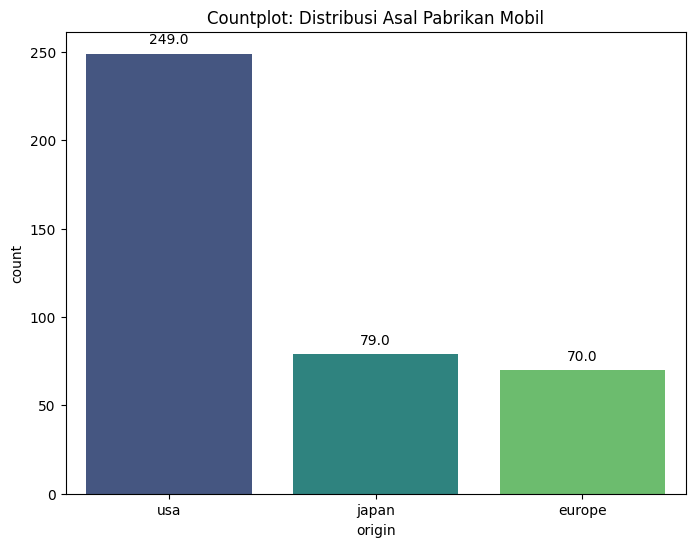

In [20]:
# berapa banyak mobil dari masing-masing negara origin?
# Membuat countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=mpg, x='origin', palette="viridis")

# Menambahkan angka pada setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Countplot: Distribusi Asal Pabrikan Mobil")
plt.show()

<ipython-input-21-57e3060f6223>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="origin", y="mpg", data=mpg, palette="viridis")


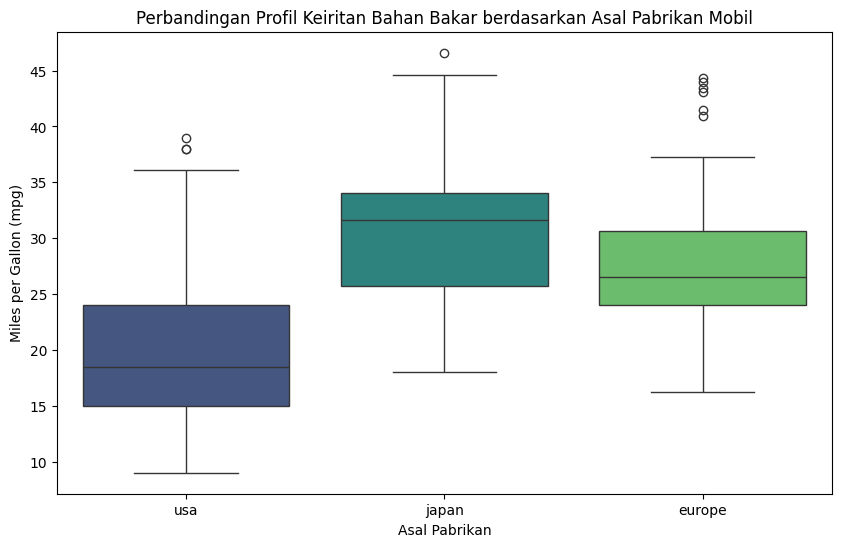

In [21]:
# exercise
# bagaimana perbandingan profile keiritan bahan bakar berdasarkan asal pabrikan mobil?
plt.figure(figsize=(10, 6))
sns.boxplot(x="origin", y="mpg", data=mpg, palette="viridis")
plt.title("Perbandingan Profil Keiritan Bahan Bakar berdasarkan Asal Pabrikan Mobil")
plt.xlabel("Asal Pabrikan")
plt.ylabel("Miles per Gallon (mpg)")
plt.show()

<ipython-input-22-ded1a81336c9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="origin", y="weight", data=mpg, palette="viridis")


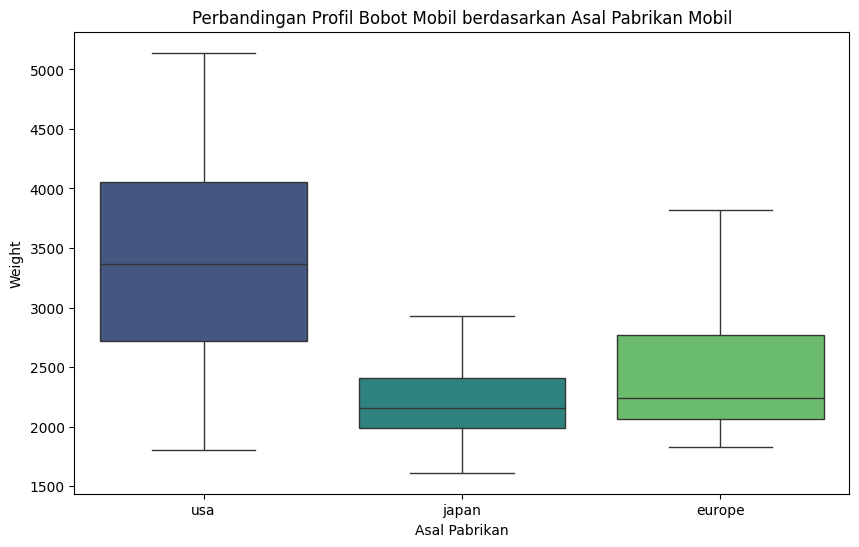

In [22]:
# exercise
# bagaimana perbandingan profile bobot mobil berdasarkan asal pabrikan mobil?
plt.figure(figsize=(10, 6))
sns.boxplot(x="origin", y="weight", data=mpg, palette="viridis")
plt.title("Perbandingan Profil Bobot Mobil berdasarkan Asal Pabrikan Mobil")
plt.xlabel("Asal Pabrikan")
plt.ylabel("Weight")
plt.show()

<ipython-input-23-5d568b4d0a6f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="model_year", y="acceleration", hue="origin", data=mpg, marker='o', ci=None)


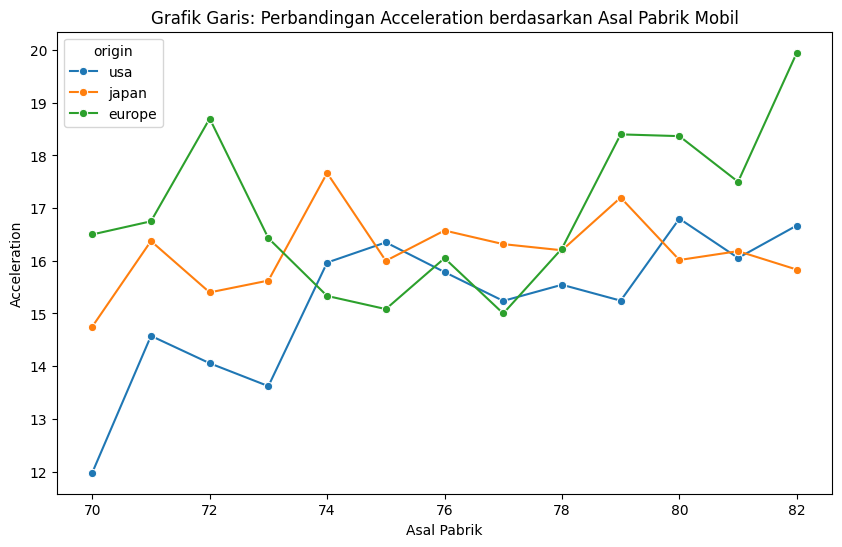

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="model_year", y="acceleration", hue="origin", data=mpg, marker='o', ci=None)
plt.title("Grafik Garis: Perbandingan Acceleration berdasarkan Asal Pabrik Mobil")
plt.xlabel("Asal Pabrik")
plt.ylabel("Acceleration")
plt.show()

1. **Jumlah mobil terbanyak** yaitu berasal dari negara USA (249) dikuti dengan Japan (79) dan Europe (70)
2.Berdasarkan **tahun model mobil** yang berasala dari **USA memiliki nilai mpg yang lebih rendah** dari pada **mobil dari Japan dan Europa**
3. Bahwa mobil dari USA cenderung memiliki efisiensi bahan bakar yang lebih rendah pada Japan dan Europe. Dengan kata lain, mobil dari **Japan dan Europe memiliki rata-rata "mpg" yang lebih tinggi, menandakan efisiensi bahan bakar yang lebih baik**.
4. Dapat dilihat dari perbandingan weight dan mpg dari tiap origin, **USA memiliki rentan weight yang lebih berat** diikuitin oleh Europe dan terakhir Japan. Hal ini dapat mempengaruhi efisiensi bahan bakar (mpg), karena **mobil yang lebih berat cenderung memerlukan lebih banyak energi untuk bergerak**, yang dapat mengakibatkan efisiensi bahan bakar yang lebih rendah.

###Analisis Berdasarkan Nama Mobil

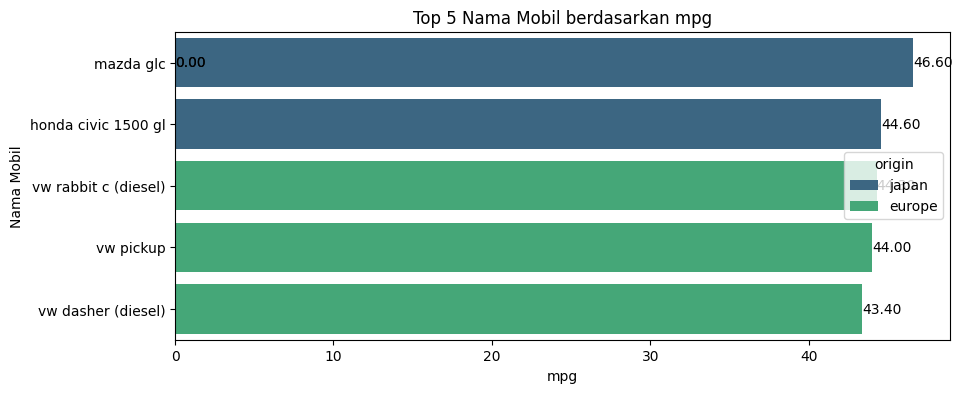

In [31]:
# Menampilkan top 5 nama mobil berdasarkan acceleration
top5_acceleration = mpg.nlargest(5, 'mpg')

# Membuat diagram batang horizontal dengan Seaborn dan menambahkan angka
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=top5_acceleration['mpg'], y=top5_acceleration['name'], hue=top5_acceleration['origin'], palette='viridis', orient='h')

# Menambahkan angka pada diagram
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height()/2), ha='left', va='center')

plt.title("Top 5 Nama Mobil berdasarkan mpg")
plt.xlabel("mpg")
plt.ylabel("Nama Mobil")
plt.show()

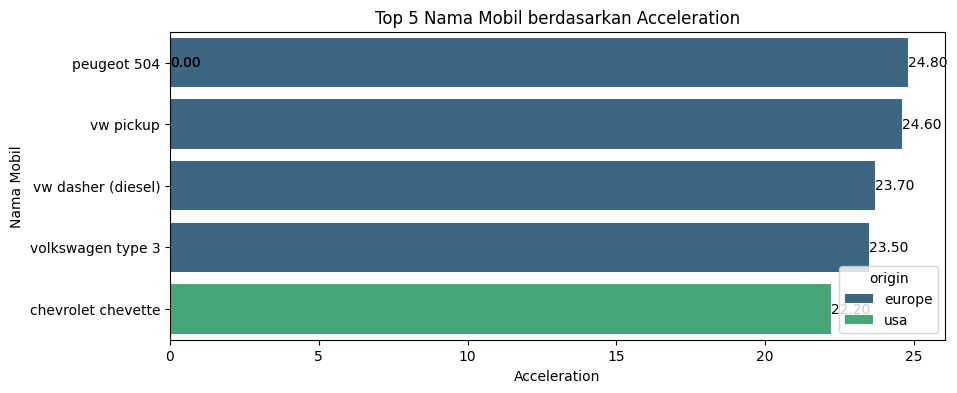

In [25]:
# Menampilkan top 5 nama mobil berdasarkan acceleration
top5_acceleration = mpg.nlargest(5, 'acceleration')

# Membuat diagram batang horizontal dengan Seaborn dan menambahkan angka
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=top5_acceleration['acceleration'], y=top5_acceleration['name'], hue=top5_acceleration['origin'], palette='viridis', orient='h')

# Menambahkan angka pada diagram
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height()/2), ha='left', va='center')

plt.title("Top 5 Nama Mobil berdasarkan Acceleration")
plt.xlabel("Acceleration")
plt.ylabel("Nama Mobil")
plt.show()

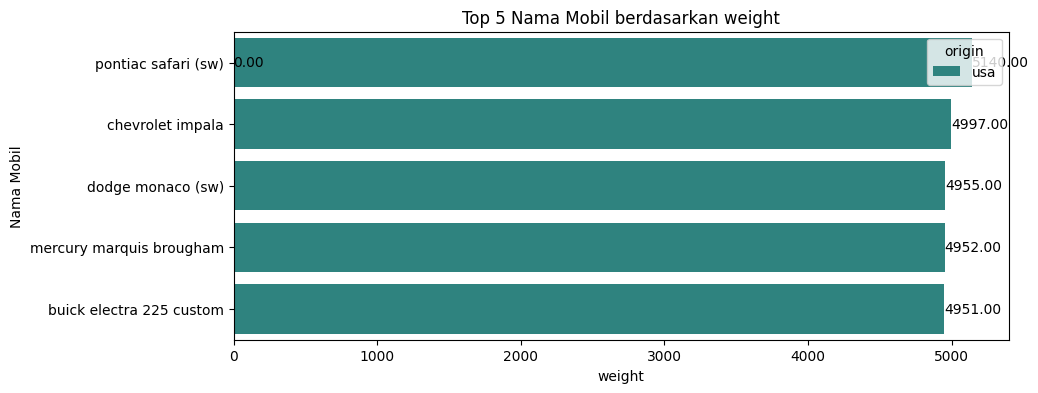

In [30]:
# Menampilkan top 5 nama mobil berdasarkan acceleration
top5_acceleration = mpg.nlargest(5, 'weight')

# Membuat diagram batang horizontal dengan Seaborn dan menambahkan angka
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=top5_acceleration['weight'], y=top5_acceleration['name'], hue=top5_acceleration['origin'], palette='viridis', orient='h')

# Menambahkan angka pada diagram
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height()/2), ha='left', va='center')

plt.title("Top 5 Nama Mobil berdasarkan weight")
plt.xlabel("weight")
plt.ylabel("Nama Mobil")
plt.show()

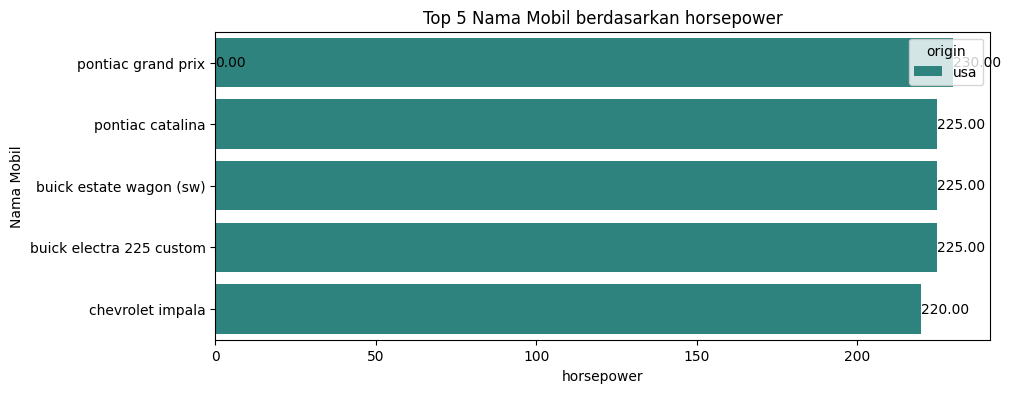

In [29]:
# Menampilkan top 5 nama mobil berdasarkan acceleration
top5_acceleration = mpg.nlargest(5, 'horsepower')

# Membuat diagram batang horizontal dengan Seaborn dan menambahkan angka
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=top5_acceleration['horsepower'], y=top5_acceleration['name'], hue=top5_acceleration['origin'], palette='viridis', orient='h')

# Menambahkan angka pada diagram
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height()/2), ha='left', va='center')

plt.title("Top 5 Nama Mobil berdasarkan horsepower")
plt.xlabel("horsepower")
plt.ylabel("Nama Mobil")
plt.show()

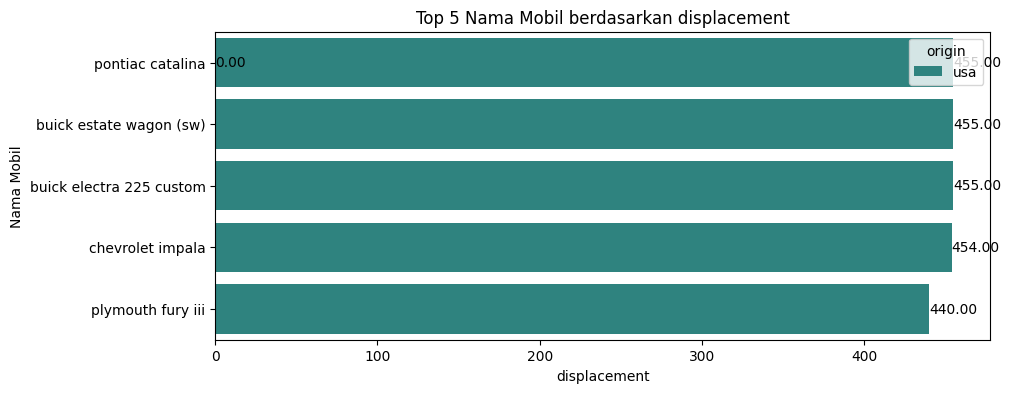

In [28]:
# Menampilkan top 5 nama mobil berdasarkan acceleration
top5_acceleration = mpg.nlargest(5, 'displacement')

# Membuat diagram batang horizontal dengan Seaborn dan menambahkan angka
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=top5_acceleration['displacement'], y=top5_acceleration['name'], hue=top5_acceleration['origin'], palette='viridis', orient='h')

# Menambahkan angka pada diagram
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height()/2), ha='left', va='center')

plt.title("Top 5 Nama Mobil berdasarkan displacement")
plt.xlabel("displacement")
plt.ylabel("Nama Mobil")
plt.show()

Kesimpulan :
- Nama mobil **pontiac catalina** memiliki **displacement paling tinggi**, **pontiac grand prix** merupakan nama mobil dengan **horsepower paling tinggi** dan **pontiac safari (sw)** merupakan nama mobil yang memiliki **weight paling tinggi**. Dari ketiga kategori variable dengan** nilai tertinggi berasal dari origin USA**
- Sedangkan yang memiliki **MPG paling tinggi** yaitu terdapat di nama mobil **mazda glc yang berasal dari Japan** dan mobil dari USA tidak masuk dalam 5 top mobil dengan mpg tertinggi